# Chapter 2: Object-Oriented Programming

## Projects

***P-2.1*** Write a Python program that inputs a polynomial in standard algebraic notation and outputs the first derivative of that polynomial

In [2]:
#Exercise P-2.1

from re import findall
from fractions import Fraction

def FirstDerivative(poly: str) -> str:
    '''It takes a polynomial, and returns the first derivative of that polynomial
    
    Parameters
    ----------
    poly:
        The polynomial in format ax^m + bx^n ... kx + c 
            
        Where:
            'a', 'b' and 'k' are coefficients (if it is a fraction enter in decimal format)
            
            'm' and 'n' are exponents    
            
            'c' is the constant (optional)
    Returns
    -------
        The derivative of the polynomial
        
    '''
  
    d_dx = str()
    pattern = r"([\+-]?)\s?(\d+\.\d+|\d+)?x\^?(\d?)"
    
    for sign, coefficient, exponent in findall(pattern=pattern, string= poly):
        
        coefficient = eval(sign + coefficient) if coefficient else eval(sign + "1") # if coefficient == "", then either x or -x
        exponent = int(exponent) if exponent else 1 # if exponent == "" then x^1

        new_coefficient = coefficient * exponent
        new_exponent = exponent -1
        
                                             # and the decimal part is greater than 0
        if isinstance(new_coefficient, float) and new_coefficient % 1:
            new_coefficient =  Fraction(new_coefficient).limit_denominator()
            
        else:
            new_coefficient = int(new_coefficient)
            
        if new_coefficient > 0:
            d_dx += "+"
            
        match new_exponent:
            case 0:
                 d_dx += f"{new_coefficient: d}"
                 
            case 1:
                if isinstance(new_coefficient, int):
                    d_dx += f"{new_coefficient: d}x"
                    
                else:
                     d_dx += f"{new_coefficient.numerator: d}x/{new_coefficient.denominator}" 
            case _:
                if isinstance(new_coefficient, int):
                    d_dx += f"{new_coefficient: d}x^{new_exponent}"
                    
                else:
                     d_dx += f"{new_coefficient.numerator: d}x^{new_exponent}/{new_coefficient.denominator}"

    d_dx = d_dx.replace("+", " +").removeprefix(" +")
    d_dx = d_dx[0] + d_dx[1:].replace("-", " -")
        
    return d_dx

polynomials = ("3x^7 + 5x^3 -11", "-x^4 + 2x^5 + 1", "2.8x^4 -3x^2 + 3")


for polynomial in polynomials:
    
    print(f"The derivative of {polynomial} is: ", end='')
    print(FirstDerivative(polynomial))
    print()
    

The derivative of 3x^7 + 5x^3 -11 is:  21x^6 + 15x^2

The derivative of -x^4 + 2x^5 + 1 is: -4x^3 + 10x^4

The derivative of 2.8x^4 -3x^2 + 3 is:  56x^3/5 -6x



***P-2.2*** Write a Python program that inputs a document and then outputs a bar-chart plot of the frequencies of each alphabet character that appears in that document.

,Letter,Count
2,E,7389
0,T,4752
4,A,4581
6,O,4495
14,S,3993
18,N,3922
9,I,3662
15,R,3505
1,H,2494
8,L,2492


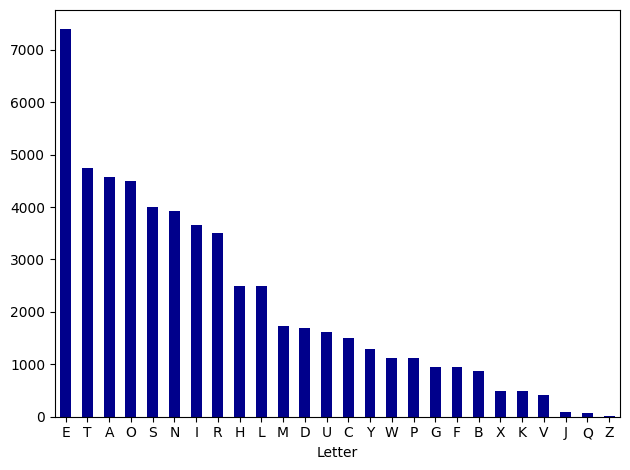

In [1]:
#Exercise P-2.2
from pathlib import Path
from pandas import DataFrame
from collections import Counter
import matplotlib.pyplot as plt

letters_count = Counter(
    Path(
         'The Game of Logic by Lewis Carroll.txt'
               ).read_text(
                   encoding='UTF-8'
                   ).upper()
    )

letters_count = {
    letter: count 
        for letter, count in letters_count.items() 
            if letter.isalpha()
    }

top20 = DataFrame(
    data=letters_count.items(), 
    columns=['Letter', 'Count'], 
    ).sort_values(
        by='Count',
        ascending=False
        )

top20.plot.bar(
    x='Letter', 
    y='Count',
    legend=False,
    rot=0,
    color='darkblue'
    )

plt.gcf().tight_layout()


top20.style.background_gradient(cmap="magma")



***P-2.3*** Write a set of Python classes that can simulate an Internet application in
which one party, Alice, is periodically creating a set of packets that she
wants to send to Bob. An Internet process is continually checking if Alice
has any packets to send, and if so, it delivers them to Bob’s computer, and
Bob is periodically checking if his computer has a packet from Alice, and,
if so, he reads and deletes it.

##### Alice Class for Project P-2.3

In [1]:
#Exercise P-2.3
import socket
import time

class Alice:
  '''Alice Class to send packets to Bob'''
  
  __ALICE_IP: str = '92.10.10.10' # Alice's IP
  __ALICE_MAC: str = '00:00:0A:BB:28:FC' # ALICE's MAC address
  __ALICE_BIN: tuple = ("localhost", 8000) # Alice's socket host-name/port-number
  __BOB_IP: str = '92.10.10.20' # BOB's IP
  __BOB_MAC: str = '10:AF:CB:EF:19:CF' # BOB's MAC address

  def __init__(self, onl: bool = False) -> None:
    '''Create a Alice object and set its connection status, default false'''
    self.online: bool = onl

  @property 
  def online(self) -> bool: # type: ignore
    '''Returns Alice's status'''
    return self.__Online

  @online.setter
  def online(self, onl: bool) ->None: # type: ignore
    '''Sets Alice's connection status'''
    if not isinstance(onl, bool):
      raise TypeError('Parameter must be a bool value')
    
    self.__Online: bool = onl
    

  def init(self) ->None:
    '''It initiates Alicie's connection to the router and, 
        once the connection is established, sends packets to Bob. 
    '''
    
    if self.online:
      
      alice_socket: socket.socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) # Create Alice's Socket
      alice_socket.bind(self.__ALICE_BIN) # Host the socket in the machine
      alice_socket.listen(1)  # Takes connection requests from other sockets, in this case the router
  
      print("Awaiting Connection...")
      print()
      router_connection: socket.socket = None # Router's socket  # type:ignore
      
      while router_connection is None: # await connection with the router
        router_connection, address = alice_socket.accept() # Accept request 
        
      print("Connection Established!")
      print(router_connection) # Display router's socket
      print()
      
      while True:
        
        message = input("\nEnter the text message to sent: ")
        ## Creating Packet ##
        destination_ip: str = self.__BOB_IP
        source_ip: str = self.__ALICE_IP
        IP_header: str = source_ip + destination_ip
        
        source_mac: str = self.__ALICE_MAC
        destination_mac: str = self.__BOB_MAC
        ethernet_header: str = source_mac + destination_mac 
        
        packet: str = ethernet_header + IP_header + message
        ## Sending Packet ##
        router_connection.send(bytes(packet, 'utf-8'))
        
        print()
        time.sleep(1) #Simulate standby
        
    else:
      raise Exception("Alice isn't online")
  
  
if __name__ == '__main__':
      
    alice: Alice = Alice(onl=True)
    alice.init() # Initialises the connection 

Awaiting Connection...



##### Router Class for Project P-2.3

In [ ]:
# Exercise P-2.3
import socket
import time

class Router:
  '''Router Class that binds and forwards data packets from Alice to Bob.'''
  
  __ROUTER_BIN: tuple = ('localhost', 8100)# Address/Port Router's socket
  __ALICE_IP: str = '92.10.10.10' # Alice's IP 
  __ALICE_MAC: str = '00:00:0A:BB:28:FC' # Alice's MAC address
  __ALICE_BIN: tuple = ("localhost", 8000) # Alice's socket host-name/port-number
  __BOB_IP: str = '92.10.10.20' # BOB's IP
  __BOB_MAC: str = '10:AF:CB:EF:19:CF' # BOB's MAC address
  __BOB_BIN: tuple = ('localhost', 8200) # BOB's socket host-name/port-number

  def __init__(self, onl: bool = False) -> None:
    '''Create a Router object and set its connection status, default False'''
    self.__Online: bool = onl
    
  @property
  def online(self) ->bool: # type: ignore
    '''Returns Router's status'''
    return self.__Online

  @online.setter
  def online(self, onl: bool) ->None: # type: ignore
    '''Sets Router's connection status'''
    if not isinstance(onl, bool):
      raise TypeError('Parameter must be a bool value')
    
    self.__Online: bool = onl

  def init(self)-> None:
    '''It initiates the router connection with Alice and Bob,\\
        once the connection is established, it continuously checks \\
        if Alice has any packets to send, and if so, delivers them to Bob's computer.
    '''
    
    if self.online:
      
      router_socket: socket.socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) # Create router's socket to receive packets from alice
      router_socket.bind(self.__ROUTER_BIN) # Host the socket in the machine
      
      router_send_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) # Create router's socket to send packets to Bob
      #Since the connection to Bob is on the same machine, the router's socket for sending packets 
      # has the same address as Bob's socket. 
      router_send_socket.bind(self.__BOB_BIN)  # That is, ALICE->ROUTER->BOB.
      
      router_send_socket.listen(2) # Takes connection requests from other sockets, in this case the Alice and BOB
      
      router_socket.connect(self.__ALICE_BIN) # Connects to Alice's socket
      
      print("Awaiting Connection...")
      print()
      bob_connection: socket.socket = None # Bob's socket # type: ignore
      
      while bob_connection is None: #await connection to Bob's socket
        
        bob_connection, address = router_send_socket.accept() # Accept request

      print("Connection Established!")
      print()
      
      while True:
        ## Unpacking the packet ## 
        received_message: str = router_socket.recv(1024).decode('utf-8')
        
        source_mac: str = received_message[:17]
        destination_mac: str = received_message[17:34]
        source_ip: str = received_message[34:45]
        destination_ip: str = received_message[45:56]
        message: str = received_message[56:]
        
        print("Packed Received:") 
        print("Verifying Integrity...")
        print()
        time.sleep(1) #Simulate standby
        
        # Checking Source
        source: bool = (
          source_ip == self.__ALICE_IP and source_mac == self.__ALICE_MAC
        );
        #Checking Destination
        destination : bool = (
          destination_mac == self.__BOB_MAC and destination_ip == self.__BOB_IP
        );
        
        if source and destination:
          
          print("Sending package...")
          time.sleep(1) #Simulate standby
          # Packing up #
          ethernet_header: str = source_mac + destination_mac
          
          IP_header: str = source_ip + destination_ip
          
          packet: str = ethernet_header + IP_header + message
          # Sending Packet to Bob#
          bob_connection.send(bytes(packet, 'utf-8'))
          
          print("Package Sent.")
          print()
          time.sleep(1) # Simulate standby
          
        else:
          exception: str = (
            "The package integrity check failed: " 
            + ('Destination and source not match' if not(source or destination)
                else "Destination not match" if source else "Source not match")
            );
          
          raise Exception(exception)
    
    else:
      raise Exception("Router isn't online")
  
  
if __name__ == '__main__':
    
    router: Router = Router(onl=True)
    router.init() # Initialises the connection 
    

##### Bob Class for Project P-2.3

In [ ]:
# Exercise P-2.3
import socket
import time

class Bob:
  '''Bob Class to receive packets from Alice'''
    
  __BOB_IP: str = '92.10.10.20' # Bob's IP
  __BOB_MAC: str = '10:AF:CB:EF:19:CF' # Bob's MAC address
  __BOB_BIN: tuple = ('localhost', 8200) # BOB's socket host-name/port-number
  __ALICE_IP: str = '92.10.10.10' # Alice's IP
  __ALICE_MAC: str = '00:00:0A:BB:28:FC' # Alice's MAC address

  def __init__(self, onl: bool = False) -> None:
    '''Create a Bob object and set its connection status, default False'''
    self.__Online : bool = onl;
    
  @property
  def online(self) -> bool: # type: ignore
    '''Returns Bob's status'''
    return self.__Online

  @online.setter
  def online(self, onl: bool) -> None: # type: ignore
    '''Sets Bob's connection status'''
    if not isinstance(onl, bool):
      raise TypeError('Parameter must be a bool value')
    
    self.__Online: bool = onl
    
  def init(self) ->None:
    '''It initiates the connection to the Router, receives Alice's packets,
        unpacks them and prints the message
    '''
    
    if self.online:
      
      bob_socket: socket.socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) #Create Bob's Socket
      #the connection to Router is on the same machine; the router's socket for sending packets 
      # has the same address as Bob's socket, so there's no need to host the socket,
      bob_socket.connect(self.__BOB_BIN) # just connect it 
      
      print("Connecting...")
      time.sleep(2)# Simulate standby 
      
      print("Bob is online")
      print()
      
      while True:
        ## Unpacking the packet ##  
        received_message: str = bob_socket.recv(1024).decode('utf-8')
        source_mac: str = received_message[0:17]
        destination_mac: str = received_message[17:34]
        source_ip: str = received_message[34:45]
        destination_ip: str = received_message[45:56]
        message: str = received_message[56:]
        
        print("Packed Received:")
        print("Verifying Integrity...")
        print()  
        time.sleep(1) #Simulate standby 
        ## Checking Source
        source: bool = (
          source_ip == self.__ALICE_IP and source_mac == self.__ALICE_MAC
        );
        #Checking Destination
        destination: bool = (
          destination_mac == self.__BOB_MAC and destination_ip == self.__BOB_IP
        );
        
        if source and destination:
          print("\nMessage Received:")
          print(message)
          print()
          
          del received_message;
        
        else:
          exception: str = (
            "The package integrity check failed: " 
            + ('Destination and source not match' if not(source or destination)
                else "Destination not match" if source else "Source not match")
          );
          
          raise Exception(exception)
    
    else:
      raise Exception("Bob isn't online")
      
  
if __name__ == '__main__':
    
    bob: Bob = Bob(onl=True)
    bob.init() # Initialises the connection 
    

***P-2.4*** Write a Python program to simulate an ecosystem containing two types of creatures, bears and fish. The ecosystem consists of a river, which is modeled as a relatively large list. Each element of the list should be a Bear object, a Fish object, or None. In each time step, based on a random process, each animal either attempts to move into an adjacent list location or stay where it is. If two animals of the same type are about to collide in the same cell, then they stay where they are, but they create a new instance of that type of animal, which is placed in a random empty (i.e., previously None) location in the list. If a bear and a fish collide, however, then the fish dies (i.e., it disappears).

In [ ]:
# Exercise P-2.4

def river(size: int = 100) ->None:

    from collections import namedtuple
    from random import randrange
    from time import sleep

    
    SIZE: int = size
    Animal: object = namedtuple('Animal', 'type') # Simulates Animal Class
    ecosystem: list = [None] * SIZE
    
    for _ in range(SIZE):
        ecosystem[randrange(SIZE)] = Animal(type='Fish')                # type: ignore           
        ecosystem[randrange(SIZE)] = Animal(type='Bear')                # type: ignore
        ecosystem[randrange(SIZE)] = None                  

    while True:
        
        index = randrange(SIZE)
        animal: Animal | None = ecosystem[index]

        if animal != None:
            
            index_move: int = randrange(SIZE) 
            
            if ecosystem[index_move] != None:
                other: Animal = ecosystem[index_move]                       # type: ignore
                
                if other.type == animal.type:
                    try: 
                        new_animal: Animal = Animal(animal.type)
                        
                        put = ecosystem.index(None) # Possible Exception
                        
                        ecosystem[put] = new_animal                         # type: ignore
                        
                    except ValueError:
                            raise Exception("Overpopulated ecosystem")
                        
                else:
                    ecosystem[index if animal.type == 'Fish' else index_move] = None # Delete Fish 
                    
            else:
                ecosystem[index_move] = animal
                ecosystem[index] = None

        print(f"\t RIVER \n".expandtabs(20))
        for i, eco in enumerate(ecosystem):
            
            print(
                eco.type if eco else eco , 
                end= ", " if (i+1) % 10  else '\n'
                )
        
        print(); print()  
        sleep(2)
                    
            
if __name__ == '__main__':
    river()